### Откроем файл с данными и изучим общую информацию

Загрузим данные из csv-файла в датафрейм c помощью библиотеки pandas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Изучим общую информацию о полученном датафрейме.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В таблице 22 столбца. Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

Построим гистограмму для всех числовых столбцов таблицы на одном графике.

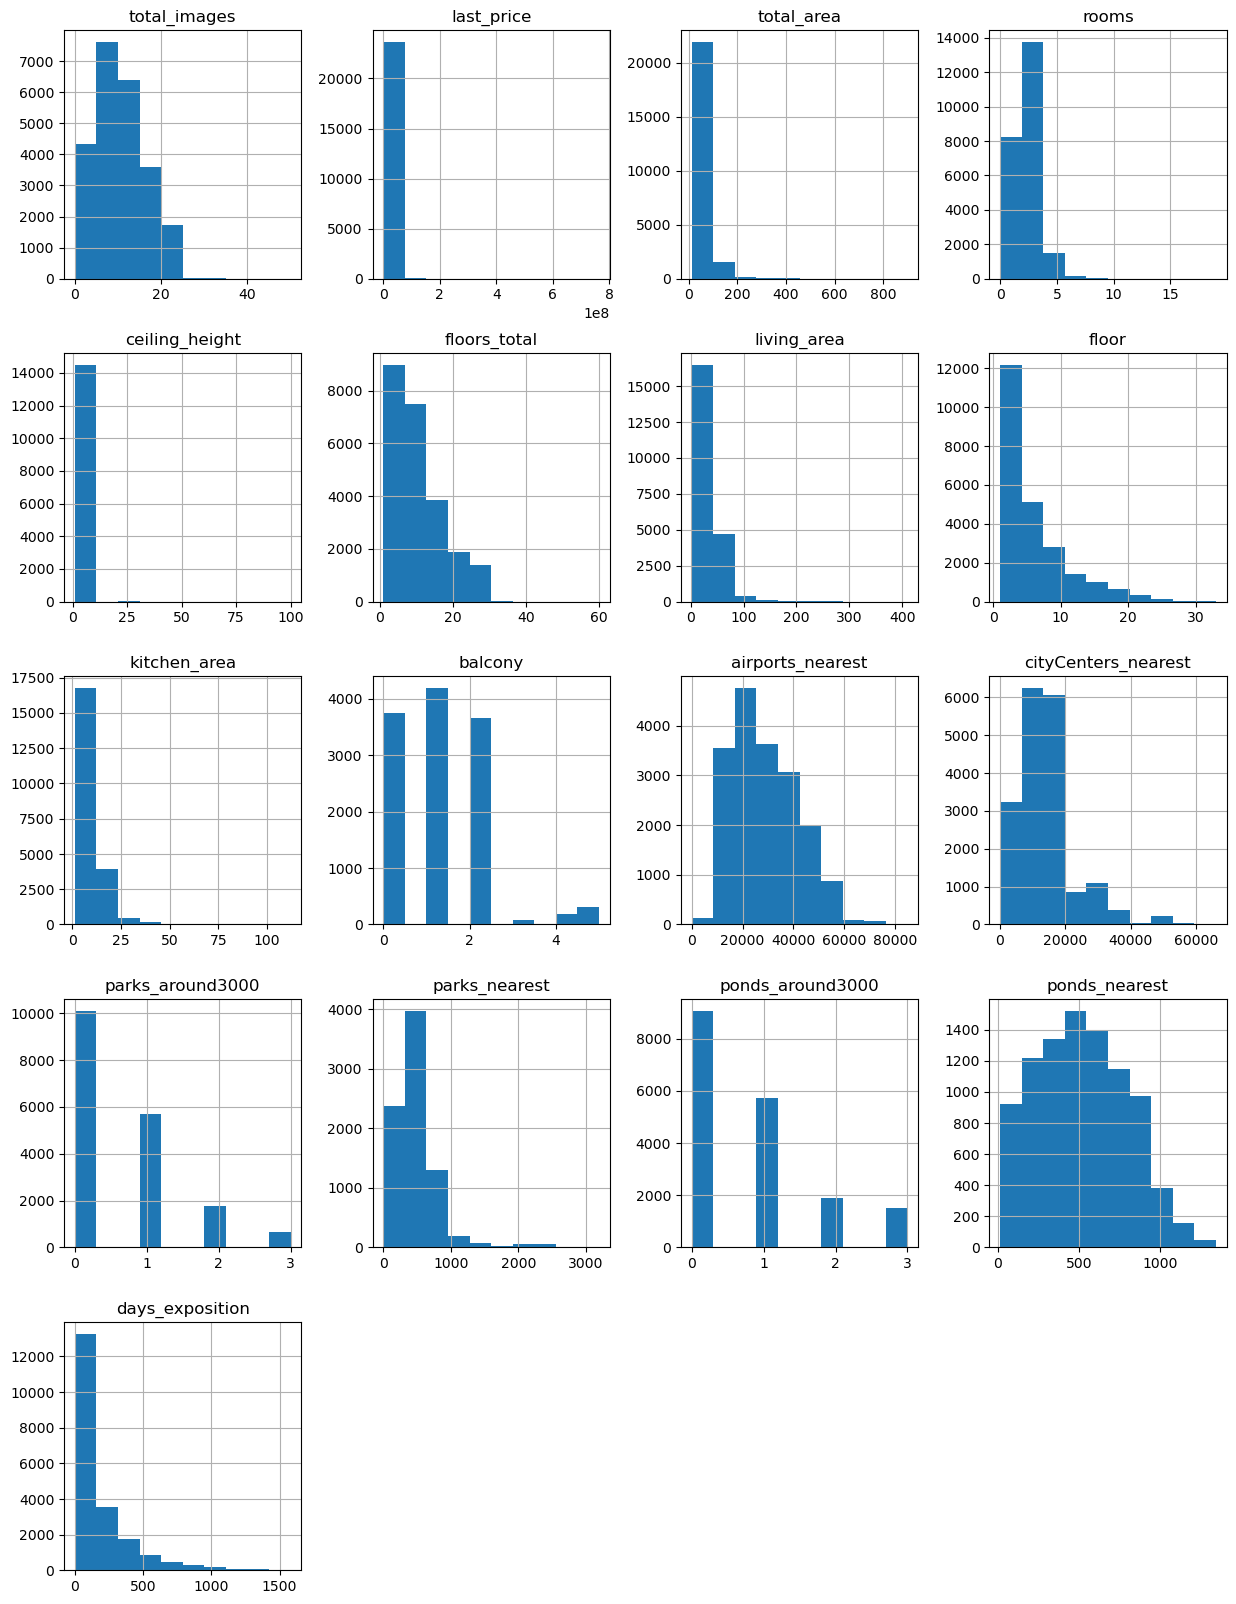

In [5]:
data.hist(figsize=(15, 20));

**Выводы**

В каждой строке таблицы — данные по каждой квартире на продажу. Всего в таблице 22 столбца.

Часть колонок описывает различные характеристики самой квартиры: цена, общая и жилая площадь, площадь кухни, высота потолков, число этажей и балконов, является ли квартира апартаментами или квартирой-студией, свободная ли у нее планировка, число парков и водоемов в радиусе 3 км, расстояние до центра города, ближайшего аэропорта, парка и водоема, название населённого пункта. Остальные данные рассказывают об объявлении: число фотографий квартиры в объявлении, дата публикации объявления, сколько дней было размещено объявление.

В данных встречаются пропуски, которые нужно по возможности устранить.

### Выполним предобработку данных

Определим, в каких столбцах есть пропуски.

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().sum())
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
        );    
    except:
        print('пропуски отсутствуют')

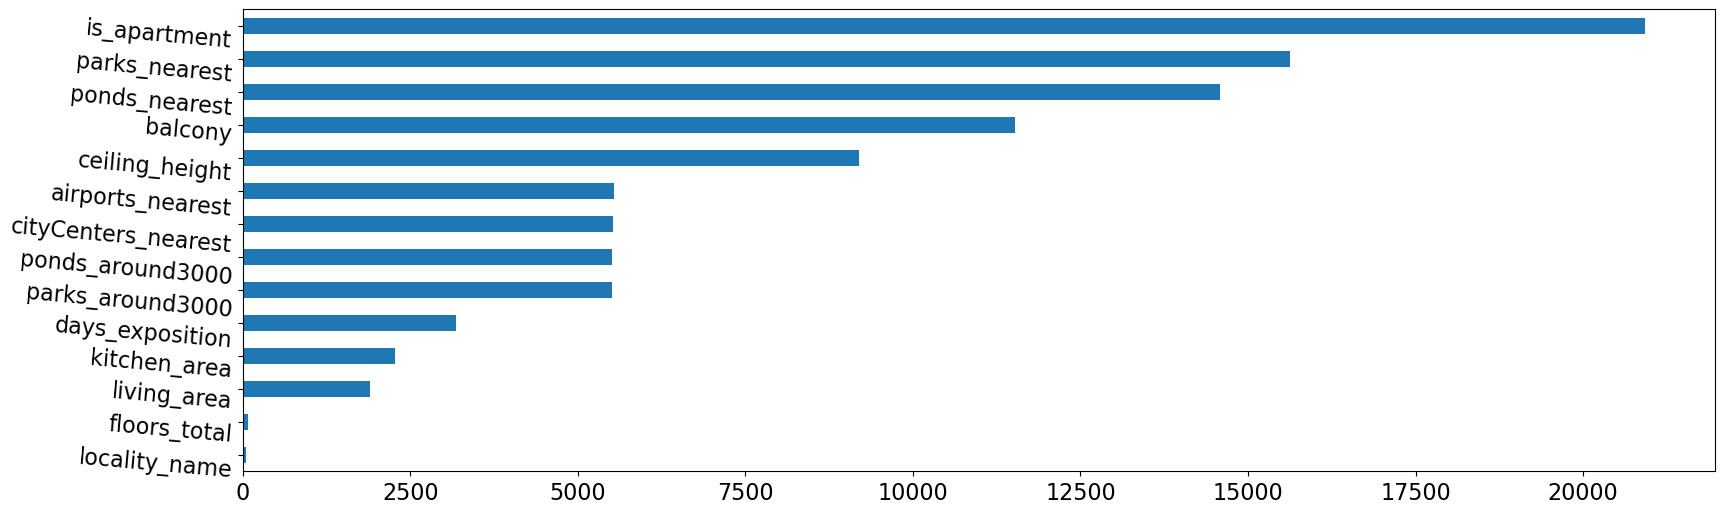

In [8]:
pass_value_barh(data)

В 14 столбцах есть пропущенные значения. Больше всего пропущенных значений присутствует в столбце `is_apartment`. 

Заполним пропущенные значения там, где это возможно. Пропуски в столбце `ceiling_height` заменим на медианное значение этого столбца, так как медиана менее чувствительна к выбросам и аномалиям. Пропуски в столбцах `floors_total` и `locality_name` удалим, так как их мало. Пропуски в столбце `is_apartment` заменим на False. Пропуски в столбцах `balcony`, `parks_around3000`, `ponds_around3000` заменим на число 0.

In [9]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data = data.dropna(subset=['floors_total'])
data = data.dropna(subset=['locality_name'])
data['is_apartment'] = data['is_apartment'].fillna(False)
data['balcony'] = data['balcony'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

Причинами пропусков в данных является как человеческий фактор, так и технические ошибки. Пропущенные значения, которые мы оставили без исправлений, – важный сигнал, который тоже нужно учитывать.

Проведем замену типов данных в столбцах `is_apartment`, `last_price`, `balcony`, `floors_total`, `parks_around3000`, `ponds_around3000` и `first_day_exposition`.

In [10]:
data['is_apartment'] = data['is_apartment'].astype(bool)

In [11]:
columns = ['last_price',
           'balcony',
           'floors_total',
           'parks_around3000',
           'ponds_around3000']
for column in columns:
    data[column] = data[column].astype(int)

In [12]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

В столбце `is_apartment` мы заменили тип данных на bool, так как он принимает только два возможных значения, True и False. В столбцах `last_price`, `balcony`, `floors_total`, `parks_around3000`, `ponds_around3000` мы заменили тип данных на int, так как в столбцах представлены целочисленные значения и отсутствуют пропуски. В столбце `first_day_exposition` мы заменили тип данных на datetime64, так как в столбце представлены значения даты и времени.

Изучим уникальные значения в столбце с названиями населенных пунктов и устраним неявные дубликаты.

In [13]:
data_locality = data.sort_values(by='locality_name', ascending=True) 
data_locality['locality_name'].unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [14]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок городского типа', 
              'городской поселок', 
              'поселок станции', 
              'поселок при железнодорожной станции', 
              'коттеджный поселок'], 
             'поселок', regex=True)
)
data_locality = data.sort_values(by='locality_name', ascending=True) 
data_locality['locality_name'].unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

In [15]:
# check
data.locality_name.nunique()

318

Населенные пункты `деревня Кудрово` и `Кудрово` лучше не объединять, так как деревня Кудрово получила статус города только в 2018 году.

Проверим количество строк-дубликатов в данных.

In [16]:
data.duplicated().sum()

0

**Вывод**

На этапе предобработки данных были выявлены пропущенные значения в 14 столбцах. Пропущенные значения были заполнены там, где это возможно. Также в некоторых столбцах был изменен тип данных и обработаны неявные дубликаты.

### Добавим в таблицу новые столбцы

In [17]:
data['price_per_sqm'] = data['last_price'] / data['total_area']
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year

In [18]:
def categorize_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'
data['floor_type'] = data.apply(categorize_floor, axis=1)

In [19]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest']/1000).round()
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,weekday_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,482.0,2,755.0,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,NaN,0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,90.0,2,574.0,558.0,92785.714286,3,8,2015,другой,14.0
3,0,64900000,159.00,2015-07-24,3,2.65,14,NaN,9,False,...,84.0,3,234.0,424.0,408176.100629,4,7,2015,другой,7.0
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,112.0,1,48.0,121.0,100000.000000,1,6,2018,другой,8.0
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,NaN,0,NaN,55.0,95065.789474,0,9,2018,другой,NaN
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,NaN,0,NaN,155.0,99195.710456,3,11,2017,другой,19.0
7,5,7915000,71.60,2019-04-18,2,2.65,24,NaN,22,False,...,NaN,0,NaN,NaN,110544.692737,3,4,2019,другой,12.0
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,NaN,0,NaN,189.0,87454.764777,2,5,2018,другой,NaN
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,NaN,0,NaN,289.0,88524.590164,6,2,2017,другой,15.0


**Вывод**

В таблицу были добавлены следующие столбцы:
- цена одного квадратного метра;
- день недели публикации объявления;
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры;
- расстояние до центра города в километрах.

### Проведем исследовательский анализ данных

**1. Изучим следующие параметры объектов и построим отдельные гистограммы для каждого из этих параметров:**
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего парка.

1.1 Сравним числовое описание данных столбца `total_area` с диаграммой размаха и построим гистограмму.

In [20]:
data['total_area'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

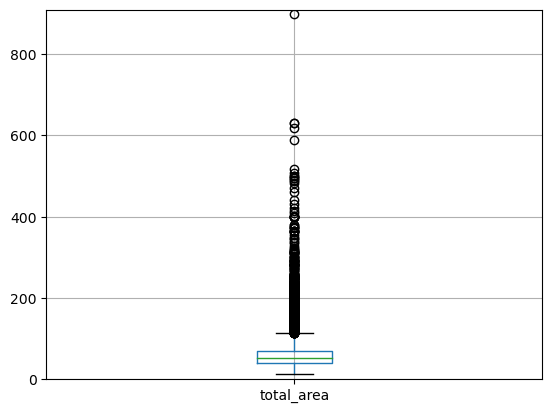

In [21]:
plt.ylim(0, 910)
data.boxplot(column='total_area');

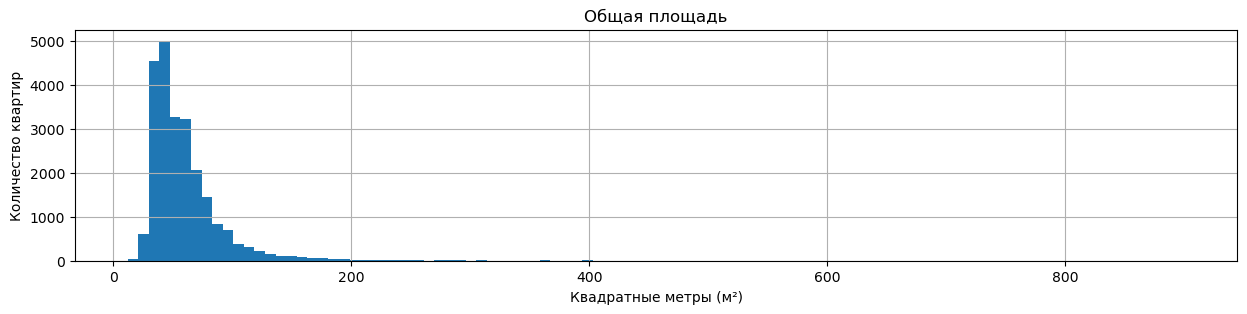

In [23]:
data.hist('total_area', bins=100, figsize = (15,3))
plt.title('Общая площадь')
plt.xlabel('Квадратные метры (м²)')
plt.ylabel('Количество квартир');

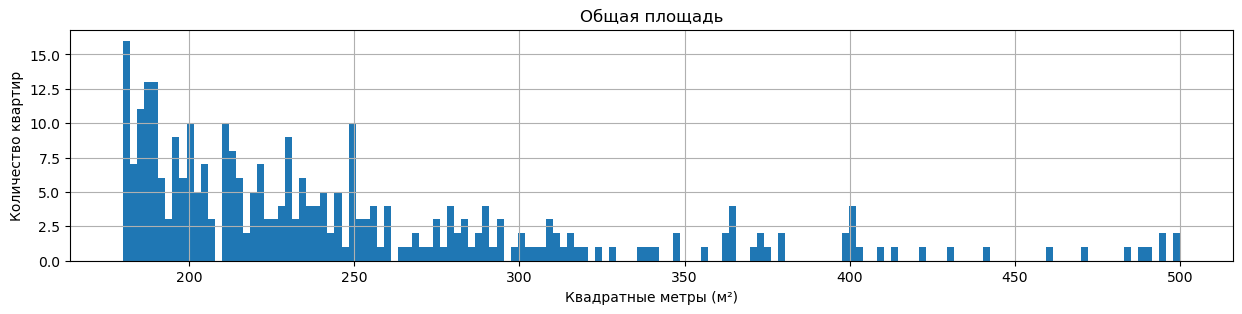

In [24]:
data.hist('total_area', bins = 150, figsize = (15,3), range = (180,500))
plt.title('Общая площадь')
plt.xlabel('Квадратные метры (м²)')
plt.ylabel('Количество квартир');

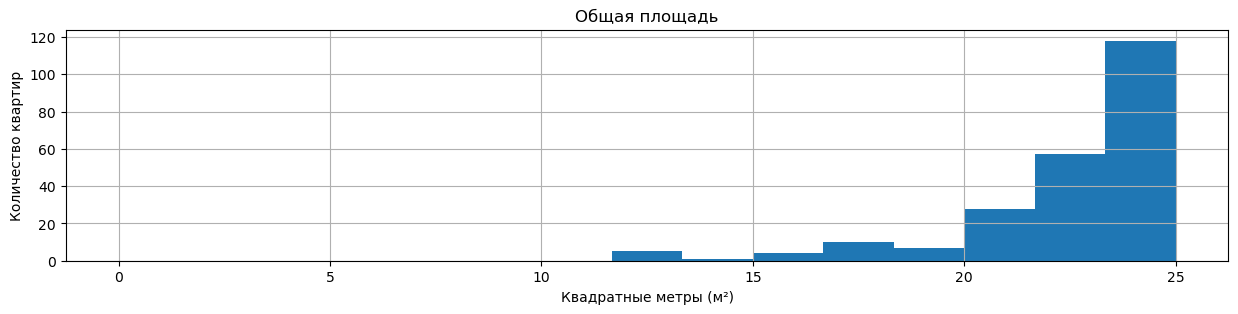

In [25]:
data.hist('total_area', bins = 15, figsize = (15,3), range = (0,25))
plt.title('Общая площадь')
plt.xlabel('Квадратные метры (м²)')
plt.ylabel('Количество квартир');

В основном продаются квартиры с общей площадью от 40 до 70 м² (медиана – 52 м²). На гистограмме квартиры с общей площадью меньше 20 м² и больше 250 м² — уже редки, поэтому удалим выбивающиеся значения и проверим потери от исходного датафрейма.

In [26]:
good_data = data.query('20 < total_area < 250')

In [27]:
(len(data) - len(good_data)) / len(data)

0.006365372374283896

Общие потери от исходного датафрейма составляют меньше 1%.

1.2 Сравним числовое описание данных столбца `living_area` с диаграммой размаха и построим гистограмму.

In [28]:
data['living_area'].describe()

count    21700.000000
mean        34.454822
std         22.045359
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

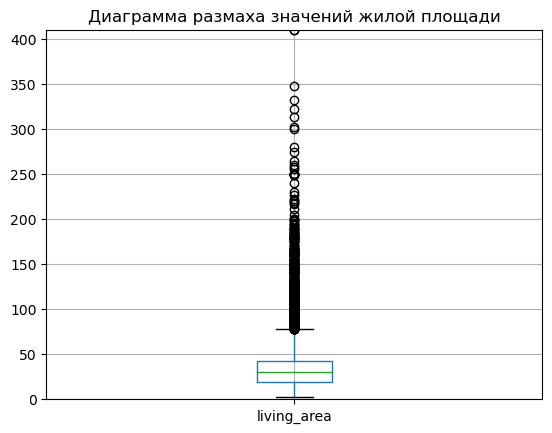

In [29]:
plt.ylim(0, 410)
data.boxplot(column='living_area')
plt.title('Диаграмма размаха значений жилой площади');

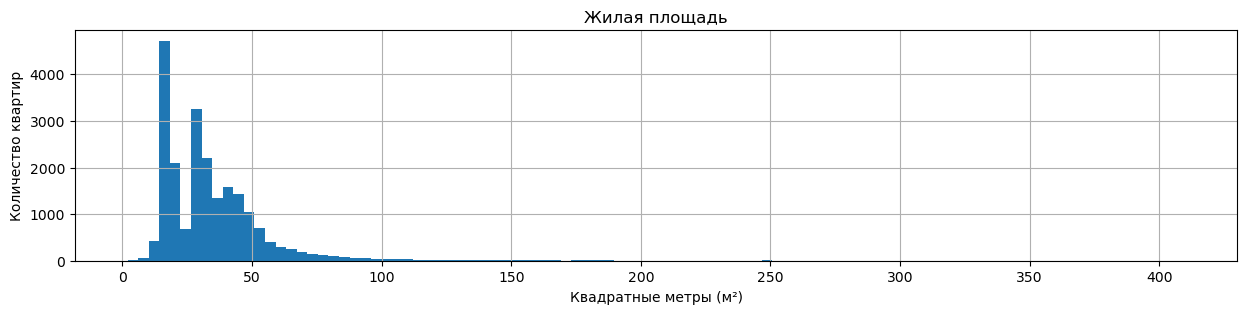

In [30]:
data.hist('living_area', bins = 100, figsize = (15,3))
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры (м²)')
plt.ylabel('Количество квартир');

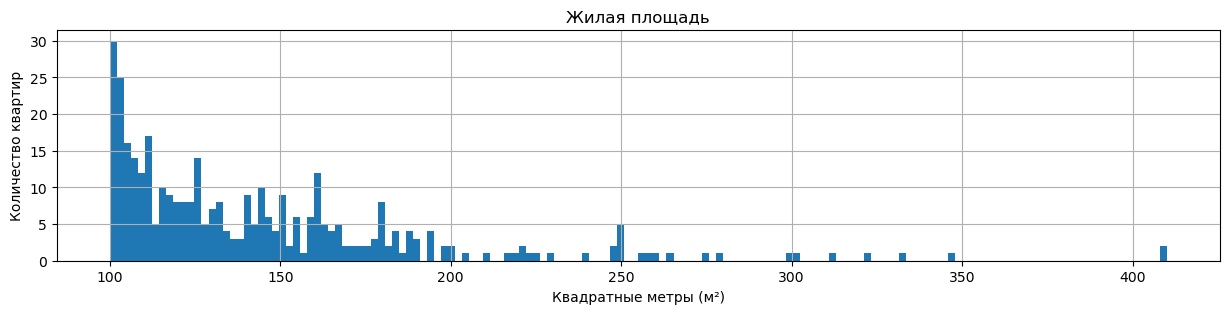

In [31]:
data.hist('living_area', bins = 150, figsize = (15,3), range = (100,410))
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры (м²)')
plt.ylabel('Количество квартир');

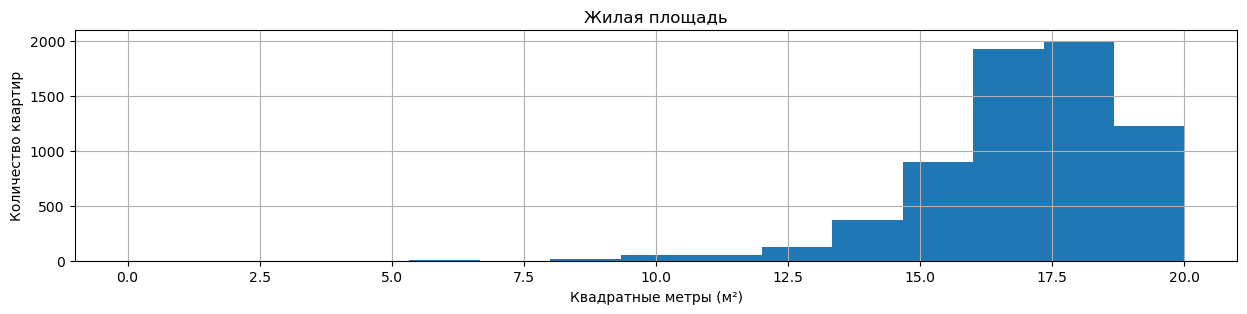

In [32]:
data.hist('living_area', bins = 15, figsize = (15,3), range = (0,20))
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры (м²)')
plt.ylabel('Количество квартир');

В основном продаются квартиры с жилой площадью от 18.6 до 42.3 м² (медиана – 30 м²). На гистограмме квартиры с жилой площадью меньше 13 м² и больше 160 м² — уже редки, поэтому удалим выбивающиеся значения и проверим потери от исходного датафрейма.

In [33]:
good_data = good_data.drop(good_data[good_data['living_area'] > 160].index)
good_data = good_data.drop(good_data[good_data['living_area'] < 13].index)

In [34]:
(len(data) - len(good_data)) / len(data)

0.015107150434967112

Общие потери от исходного датафрейма составляют 1%.

1.3 Сравним числовое описание данных столбца `kitchen_area` с диаграммой размаха и построим гистограмму.

In [35]:
data['kitchen_area'].describe()

count    21343.000000
mean        10.560994
std          5.900630
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

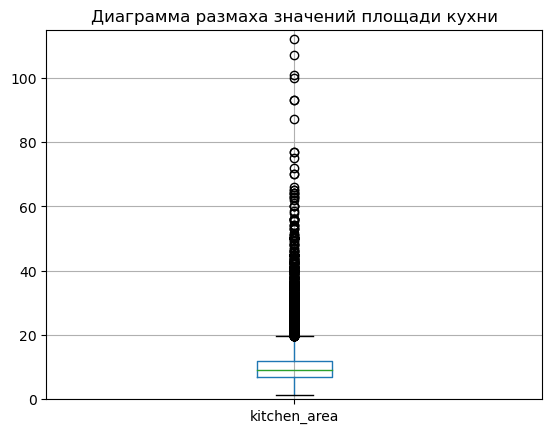

In [36]:
plt.ylim(0, 115)
data.boxplot(column='kitchen_area')
plt.title('Диаграмма размаха значений площади кухни');

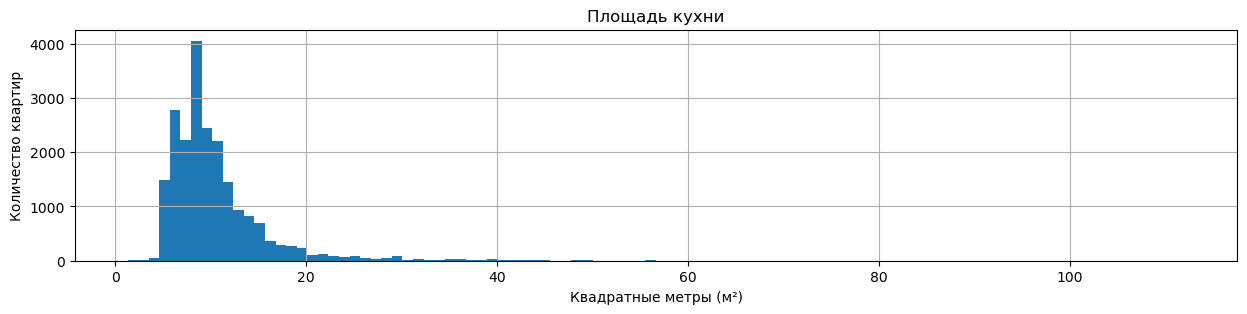

In [37]:
data.hist('kitchen_area', bins=100, figsize = (15,3))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры (м²)')
plt.ylabel('Количество квартир');

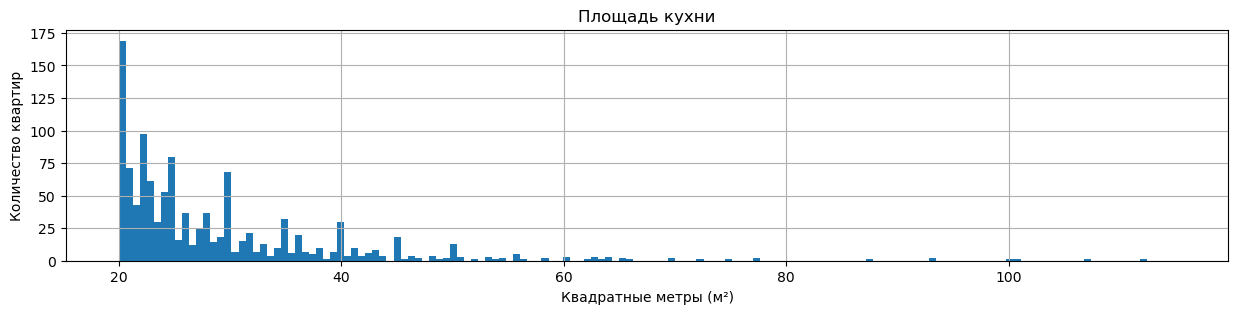

In [38]:
data.hist('kitchen_area', bins = 150, figsize = (15,3), range = (20,115))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры (м²)')
plt.ylabel('Количество квартир');

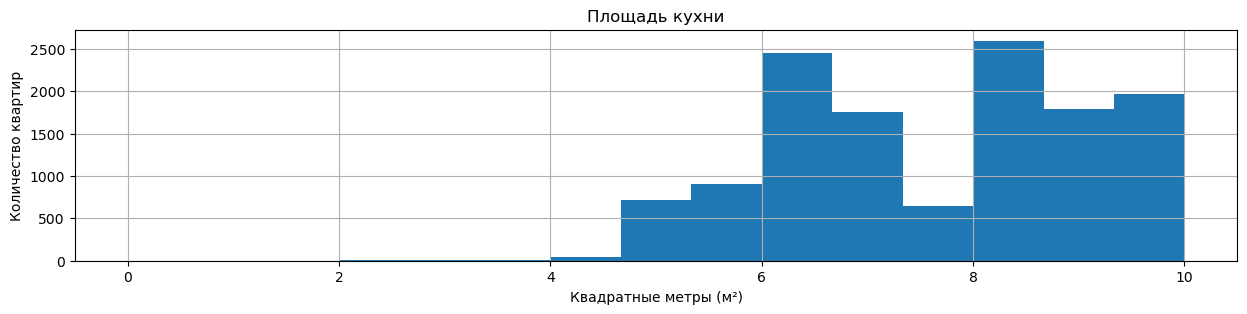

In [39]:
data.hist('kitchen_area', bins = 15, figsize = (15,3), range = (0,10))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры (м²)')
plt.ylabel('Количество квартир');

В основном продаются квартиры с площадью кухни от 7 до 12 м² (медиана – 9.1 м²). На гистограмме квартиры с жилой площадью меньше 5 м² и больше 40 м² — уже редки, поэтому удалим выбивающиеся значения и проверим потери от исходного датафрейма.

In [40]:
good_data = good_data.drop(good_data[good_data['kitchen_area'] > 40].index)
good_data = good_data.drop(good_data[good_data['kitchen_area'] < 5].index)

In [41]:
(len(data) - len(good_data)) / len(data)

0.023509441969021855

Общие потери от исходного датафрейма составляют 2%.

1.4 Сравним числовое описание данных столбца `last_price` с диаграммой размаха и построим гистограмму.

In [42]:
(data['last_price'] / 1000000).describe()

count    23565.000000
mean         6.540058
std         10.910935
min          0.012190
25%          3.400000
50%          4.646000
75%          6.790000
max        763.000000
Name: last_price, dtype: float64

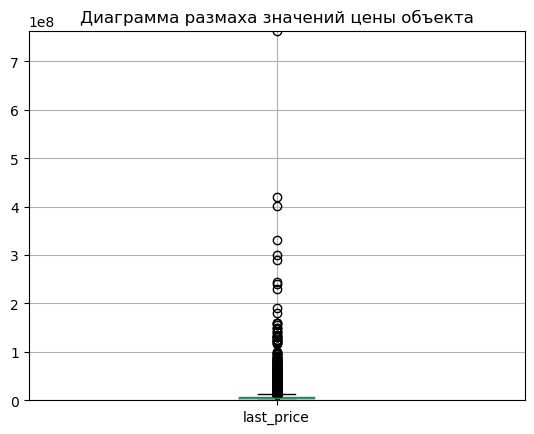

In [43]:
plt.ylim(0, 764000000)
data.boxplot(column='last_price')
plt.title('Диаграмма размаха значений цены объекта');

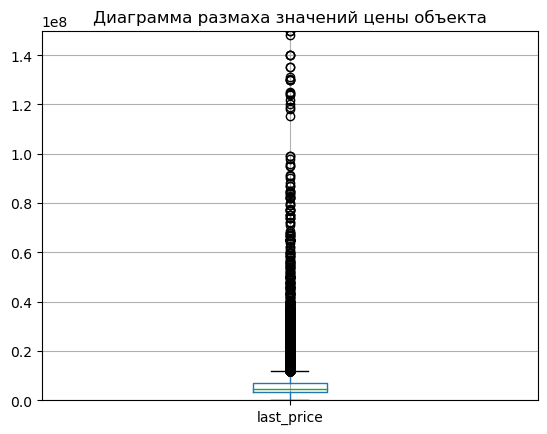

In [44]:
plt.ylim(0, 150000000)
data.boxplot(column='last_price')
plt.title('Диаграмма размаха значений цены объекта');

In [45]:
data.query('last_price > 100000000')['last_price'].count()

37

In [46]:
data.query('last_price < 100000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,weekday_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
8793,7,12190,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,805.0,0,NaN,8.0,111.834862,2,3,2019,последний,9.0


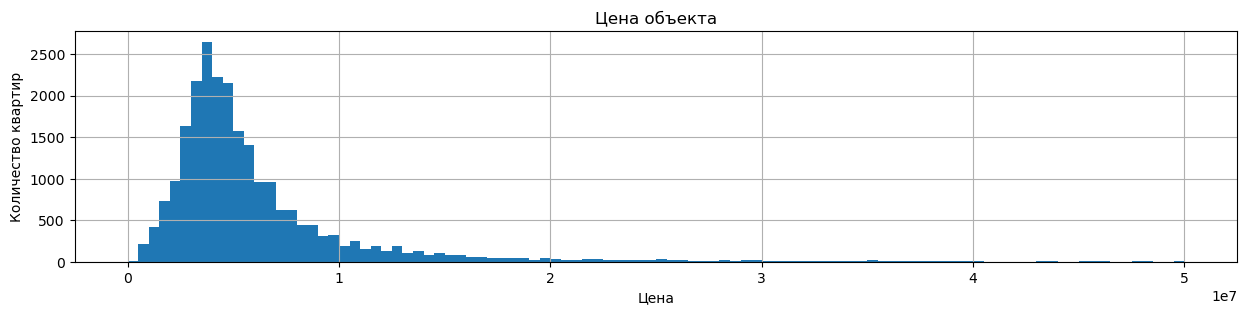

In [47]:
data.hist('last_price', bins=100, range=(0, 50000000), figsize = (15,3))
plt.title('Цена объекта')
plt.xlabel('Цена')
plt.ylabel('Количество квартир');

В основном продаются квартиры стоимостью от 3 до 6 миллионов (медиана – 4 646 000). На гистограмме квартиры стоимостью больше 20 миллионов — уже редки. Значение 12190 – аномально низкое, а значения выше 100 миллионов очень редки, поэтому удалим выбивающиеся значения и проверим потери от исходного датафрейма.

In [48]:
good_data = good_data.query('12190 < last_price < 100000000')

In [49]:
(len(data) - len(good_data)) / len(data)

0.02389136431147889

Общие потери от исходного датафрейма составляют 2%.

1.5 Сравним числовое описание данных столбца `rooms` с диаграммой размаха и построим гистограмму.

In [50]:
data['rooms'].describe()

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

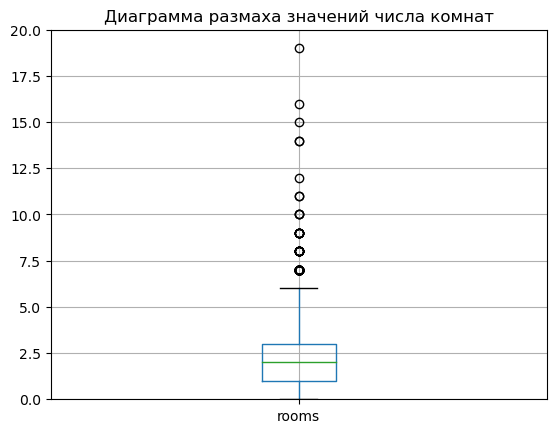

In [51]:
plt.ylim(0, 20)
data.boxplot(column='rooms')
plt.title('Диаграмма размаха значений числа комнат');

In [52]:
data.query('rooms == 0')['rooms'].count()

194

In [53]:
data.query('rooms > 7')['rooms'].count()

31

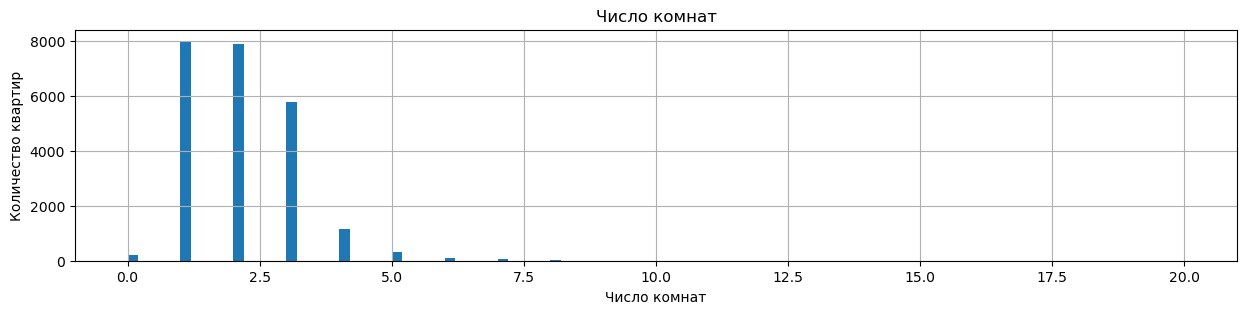

In [54]:
data.hist('rooms', bins=100, range=(0,20), figsize = (15,3))
plt.title('Число комнат')
plt.xlabel('Число комнат')
plt.ylabel('Количество квартир');

В основном продаются квартиры c 1-3 комнатами (медиана – 2 комнаты). На гистограмме квартиры с числом комнат больше 7 — уже редки. Есть небольшое количество квартир, у которых 0 комнат, поэтому удалим выбивающиеся значения и проверим потери от исходного датафрейма.

In [55]:
good_data = good_data.query('0 < rooms < 7')

In [56]:
(len(data) - len(good_data)) / len(data)

0.033227243793761935

Общие потери от исходного датафрейма составляют 3%.

1.6 Сравним числовое описание данных столбца `ceiling_height` с диаграммой размаха и построим гистограмму.

In [57]:
data['ceiling_height'].describe()

count    23565.000000
mean         2.724530
std          0.991026
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

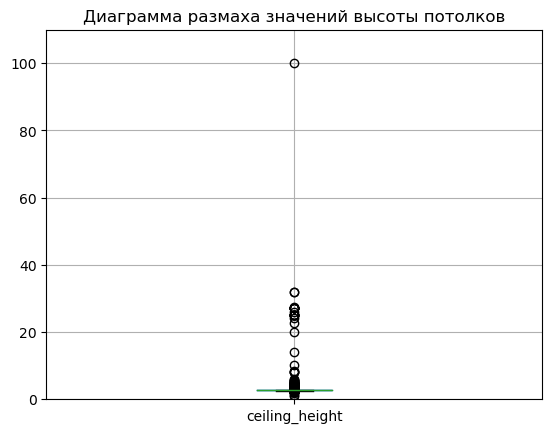

In [58]:
plt.ylim(0, 110)
data.boxplot(column='ceiling_height')
plt.title('Диаграмма размаха значений высоты потолков');

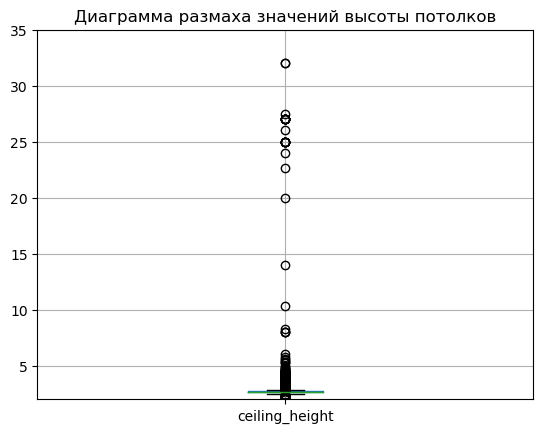

In [59]:
plt.ylim(2, 35)
data.boxplot(column='ceiling_height')
plt.title('Диаграмма размаха значений высоты потолков');

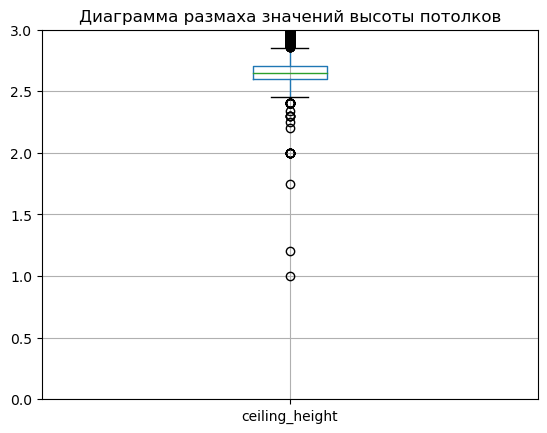

In [60]:
plt.ylim(0, 3)
data.boxplot(column='ceiling_height')
plt.title('Диаграмма размаха значений высоты потолков');

In [61]:
data.query('ceiling_height > 6')['ceiling_height'].count()

29

In [62]:
data.query('ceiling_height < 2')['ceiling_height'].count()

3

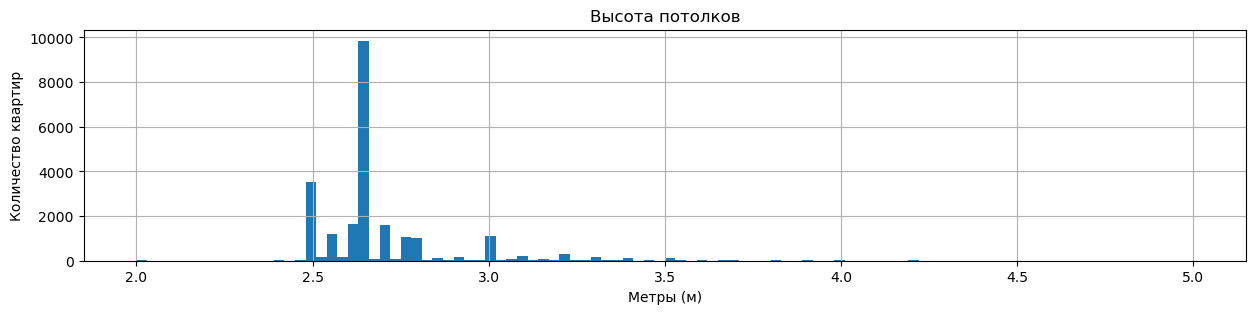

In [63]:
data['ceiling_height'].hist(bins=100, range=(2,5), figsize = (15,3))
plt.title('Высота потолков')
plt.xlabel('Метры (м)')
plt.ylabel('Количество квартир');

В основном продаются квартиры c потолками высотой 2.65 м. На гистограмме квартиры с высотой потолков больше 3 м — уже редки. Значения больше 6 м – аномально высокие, а значения меньше 2 м – аномально низкие, поэтому удалим выбивающиеся значения и проверим потери от исходного датафрейма.

In [64]:
good_data = good_data.query('2 < ceiling_height < 6')

In [65]:
(len(data) - len(good_data)) / len(data)

0.03500954805856143

Общие отери от исходного датафрейма составляют 3%.

1.7 Построим гистограмму столбца `floor_type`.

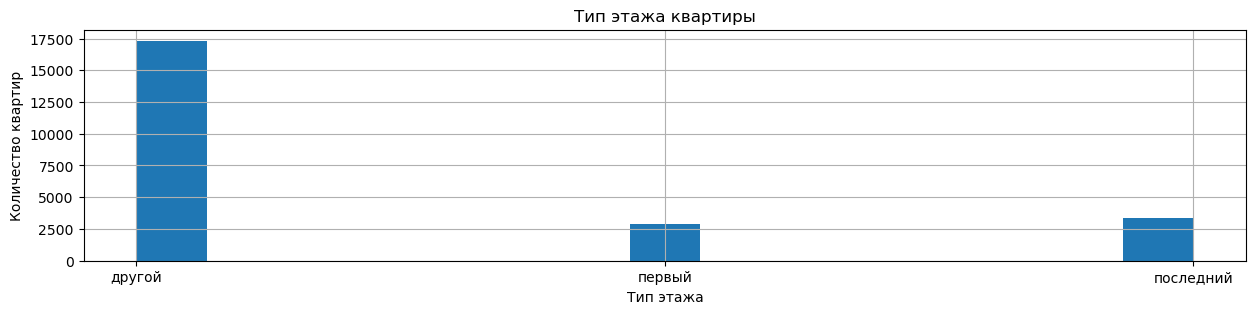

In [66]:
data['floor_type'].hist(bins=15, figsize = (15,3))
plt.title('Тип этажа квартиры')
plt.xlabel('Тип этажа')
plt.ylabel('Количество квартир');

В основном продаются квартиры не на первом и не на последнем этажах. На гистограмме количество квартир на последнем этаже больше, чем количество квартир на первом этаже.

1.8 Сравним числовое описание данных столбца `floors_total` с диаграммой размаха и построим гистограмму.

In [67]:
data['floors_total'].describe()

count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

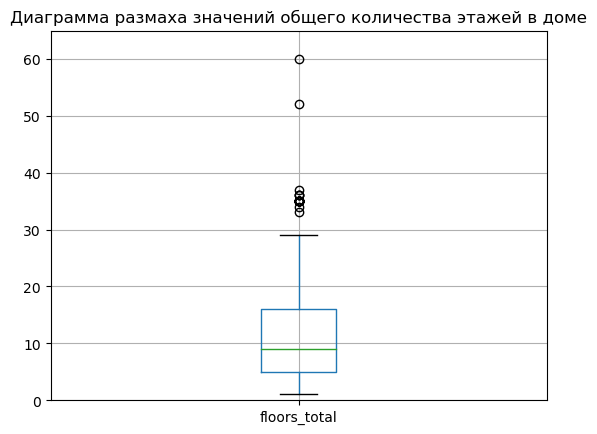

In [68]:
plt.ylim(0, 65)
data.boxplot(column='floors_total')
plt.title('Диаграмма размаха значений общего количества этажей в доме');

In [69]:
data[data['floors_total'] > 50]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,weekday_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
2253,12,3800000,45.5,2018-06-28,2,2.88,60,27.4,4,False,...,342.0,3,614.0,166.0,83516.483516,3,6,2018,другой,49.0
16731,9,3978000,40.0,2018-09-24,1,2.65,52,10.5,18,False,...,793.0,0,NaN,45.0,99450.000000,0,9,2018,другой,13.0


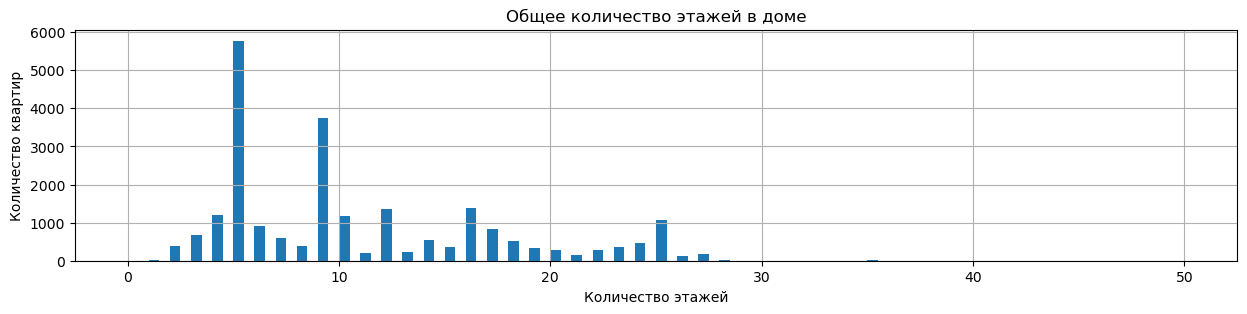

In [70]:
data['floors_total'].hist(bins=100, range = (0,50), figsize = (15,3))
plt.title('Общее количество этажей в доме')
plt.xlabel('Количество этажей')
plt.ylabel('Количество квартир');

В основном продаются квартиры в домах, в которых 5 и 9 этажей. На гистограмме квартиры в домах, в которых общее количество этажей больше 30, — уже редки. Значения больше 50 этажей – аномально высокие, поэтому удалим выбивающиеся значения и проверим потери от исходного датафрейма.

In [71]:
good_data = good_data.query('floors_total < 50')

In [72]:
(len(data) - len(good_data)) / len(data)

0.035051983874389986

Общие отери от исходного датафрейма составляют 3%.

1.9 Сравним числовое описание данных столбца `cityCenters_nearest` с диаграммой размаха и построим гистограмму.

In [73]:
data['cityCenters_nearest'].describe()

count    18064.000000
mean     14192.656056
std       8613.348153
min        181.000000
25%       9238.000000
50%      13096.500000
75%      16285.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

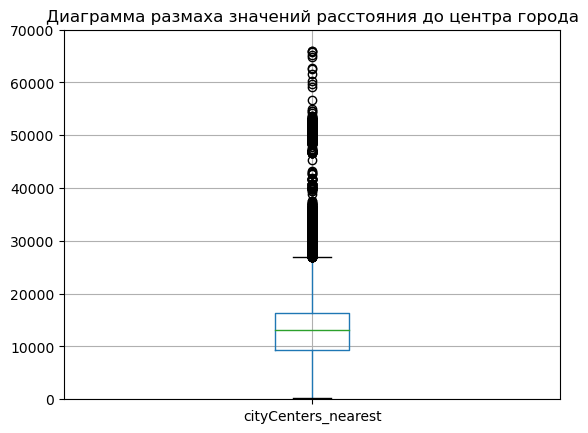

In [74]:
plt.ylim(0, 70000)
data.boxplot(column='cityCenters_nearest')
plt.title('Диаграмма размаха значений расстояния до центра города');

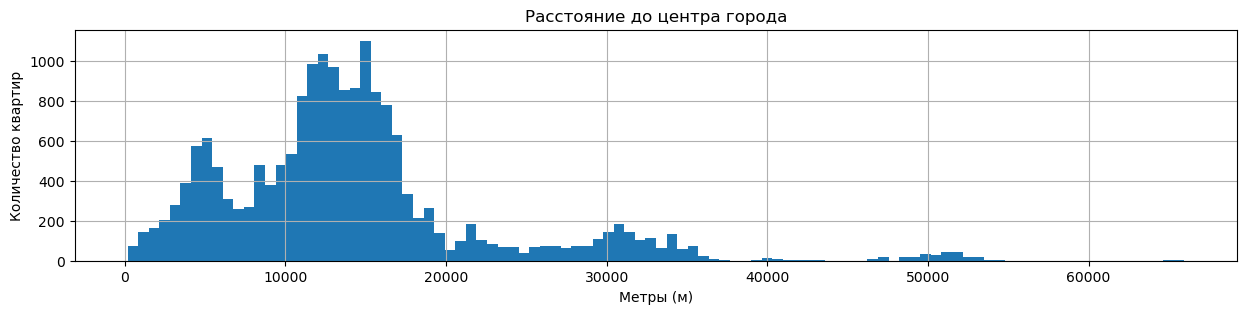

In [75]:
data['cityCenters_nearest'].hist(bins=100, figsize = (15,3))
plt.title('Расстояние до центра города')
plt.xlabel('Метры (м)')
plt.ylabel('Количество квартир');

В основном продаются квартиры с расстоянием до центра города от 9 до 17 км (медиана – 13 км). На гистограмме квартиры с расстоянием до центра города больше 35 км — уже редки.

1.10 Сравним числовое описание данных столбца `parks_nearest` с диаграммой размаха и построим гистограмму.

In [76]:
data['parks_nearest'].describe()

count    8030.000000
mean      490.580448
std       341.572956
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

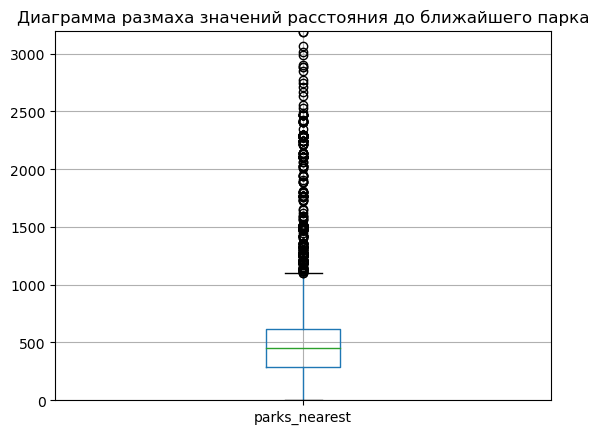

In [77]:
plt.ylim(0, 3200)
data.boxplot(column='parks_nearest')
plt.title('Диаграмма размаха значений расстояния до ближайшего парка');

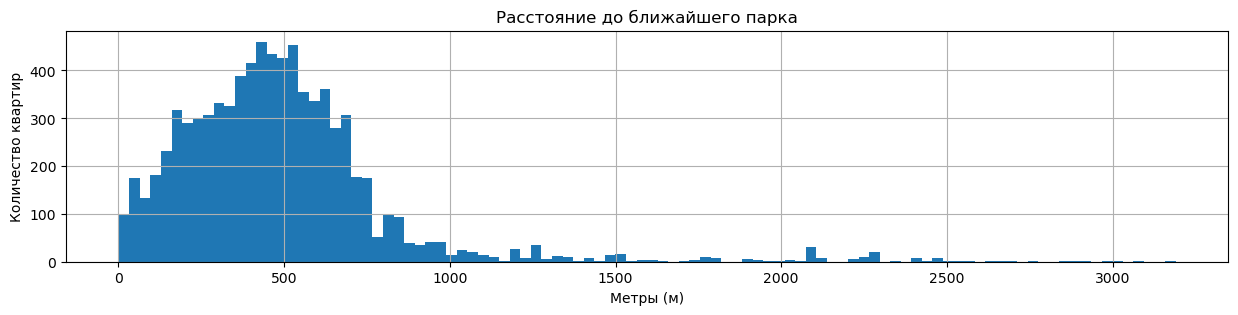

In [78]:
data['parks_nearest'].hist(bins=100, figsize = (15,3))
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Метры (м)')
plt.ylabel('Количество квартир');

В основном продаются квартиры с расстоянием до ближайшего парка от 250 до 600 м (медиана – 454.5 м). На гистограмме квартиры с расстоянием до ближайшего парка больше 1000 м — уже редки.

In [79]:
# check
good_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22739 entries, 0 to 23697
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            22739 non-null  int64         
 1   last_price              22739 non-null  int64         
 2   total_area              22739 non-null  float64       
 3   first_day_exposition    22739 non-null  datetime64[ns]
 4   rooms                   22739 non-null  int64         
 5   ceiling_height          22739 non-null  float64       
 6   floors_total            22739 non-null  int64         
 7   living_area             20928 non-null  float64       
 8   floor                   22739 non-null  int64         
 9   is_apartment            22739 non-null  bool          
 10  studio                  22739 non-null  bool          
 11  open_plan               22739 non-null  bool          
 12  kitchen_area            20775 non-null  float64    

In [80]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    good_data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max', 'median'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,739.00","22,739.00","22,739.00","19,704.00","22,739.00","20,928.00","20,775.00","22,739.00","22,739.00"
min,1.00,20.10,2.25,1.00,"430,000.00",13.00,5.00,1.00,1.00
max,6.00,244.00,5.50,"1,580.00","98,000,000.00",160.00,40.00,33.00,36.00
median,2.00,52.00,2.65,95.00,"4,650,000.00",30.00,9.00,4.00,9.00


**2. Изучим, как быстро продавались квартиры (столбец `days_exposition`). Этот параметр показывает, сколько дней было размещено каждое объявление.**

In [88]:
good_data['days_exposition'].describe()

count    19704.000000
mean       180.514921
std        219.232018
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Средняя длительность размещения объвления - 180 дней.
Медианная длительность размещения объвления - 95 дней.

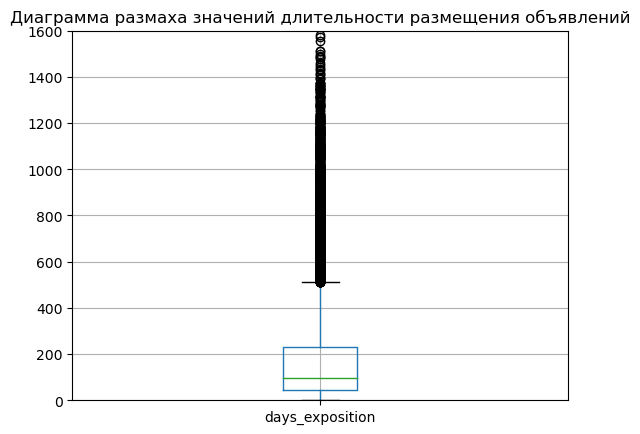

In [89]:
plt.ylim(0, 1600)
good_data.boxplot(column='days_exposition')
plt.title('Диаграмма размаха значений длительности размещения объявлений');

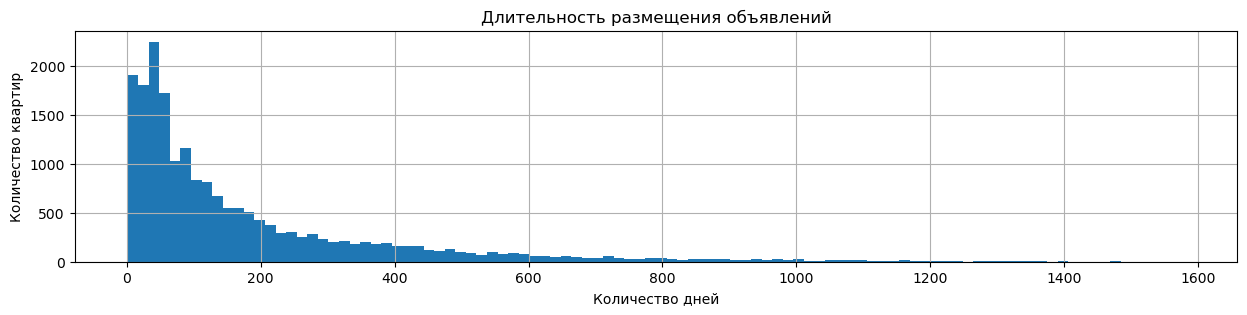

In [90]:
good_data['days_exposition'].hist(bins=100, figsize = (15,3))
plt.title('Длительность размещения объявлений')
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир');

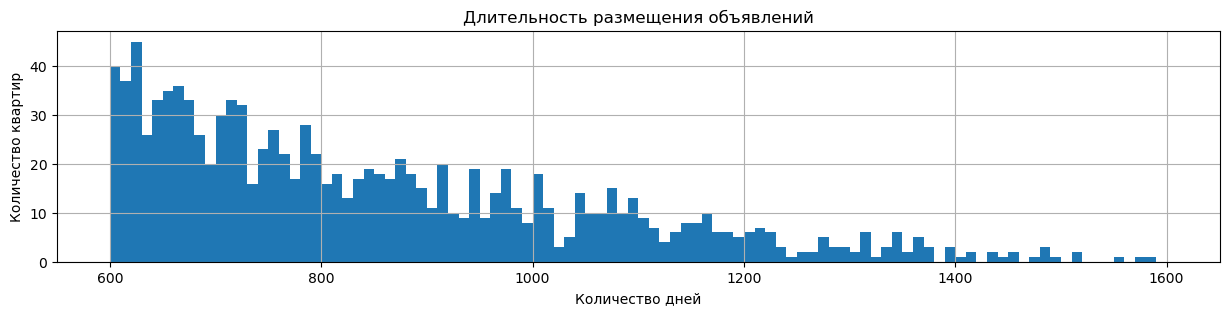

In [91]:
good_data.hist('days_exposition', bins = 100, figsize = (15,3), range = (600,1600))
plt.title('Длительность размещения объявлений')
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир');

На гистограмме квартиры с длительностью размещения дольше 1000 дней — уже редки, поэтому удалим выбивающиеся значения и проверим потери от исходного датафрейма.

In [92]:
good_data = good_data.drop(good_data[good_data['days_exposition'] > 1000].index)

In [93]:
(len(data) - len(good_data)) / len(data)

0.04621260343730108

Общие потери от исходного датафрейма составляют 4%.

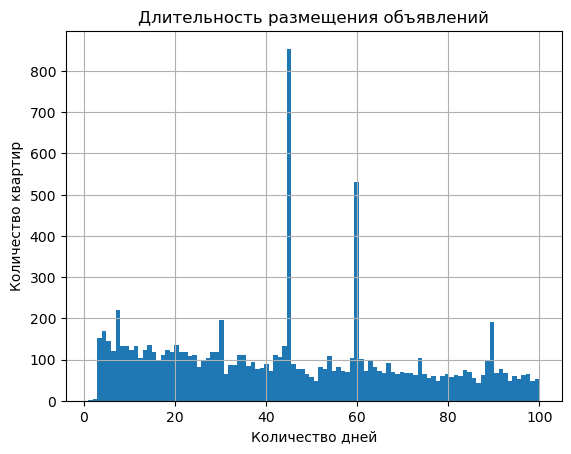

In [94]:
good_data['days_exposition'].hist(bins=100, range=(1,100))
plt.title('Длительность размещения объявлений')
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир');

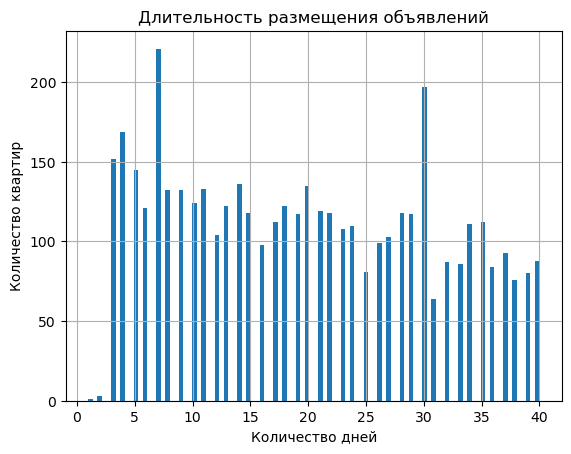

In [95]:
good_data['days_exposition'].hist(bins=100, range=(1,40))
plt.title('Длительность размещения объявлений')
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир');

По гистограмме количества дней, в течение которых было размещено объявление, можно заметить небольшие пики у значений 7, 30 и 90 дней, а также большие пики у значений 45 и 60 дней. Можно предположить, что данные значения связаны с ограничениями сервиса Яндекс Недвижимость по сроку размещения объявлений. После истечения срока размещения объявление может быть удалено, при этом квартиру могут еще не купить. Быстрыми можно считать продажи до 45 дней. Необычно долгими можно считать продажи дольше 230 дней.

**3. Определим факторы, которые больше всего влияют на общую (полную) стоимость объекта.
Изучим, зависит ли цена от:**
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

3.1 Изучим зависимость цены от общей площади и посчитаем корреляцию.

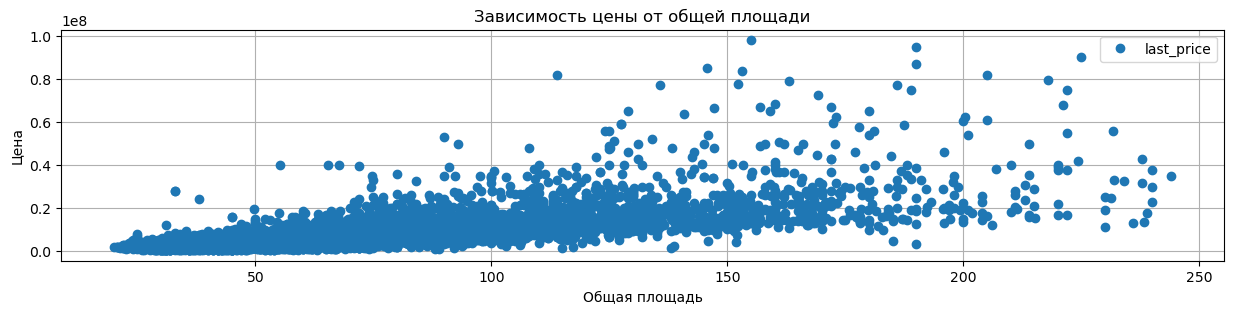

In [97]:
good_data.plot(x='total_area', y='last_price', style='o', grid=True, figsize=(15, 3))
plt.title('Зависимость цены от общей площади')
plt.xlabel('Общая площадь')
plt.ylabel('Цена');

In [98]:
good_data['total_area'].corr(good_data['last_price'])

0.7375851054980187

С увеличением общей площади увеличивается общая стоимость квартиры.

3.2 Изучим зависимость цены от жилой площади и посчитаем корреляцию.

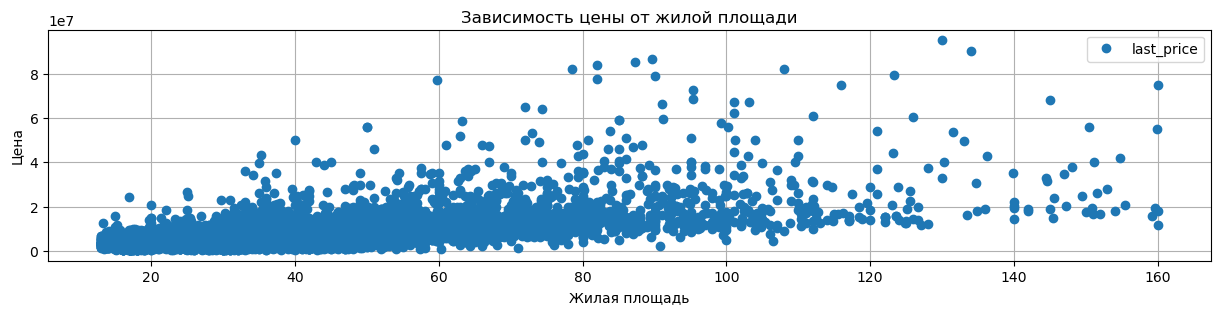

In [99]:
good_data.plot(x='living_area', y='last_price', style='o', grid=True, figsize=(15, 3))
plt.title('Зависимость цены от жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Цена');

In [100]:
good_data['living_area'].corr(good_data['last_price'])

0.6445920748402173

С увеличением жилой площади увеличивается общая стоимость квартиры.

3.3 Изучим зависимость цены от площади кухни и посчитаем корреляцию.

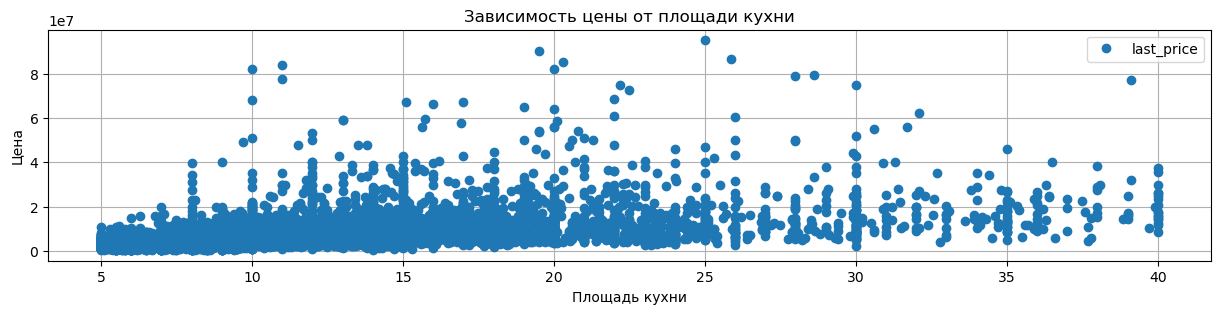

In [101]:
good_data.plot(x='kitchen_area', y='last_price', style='o', grid=True, figsize=(15, 3))
plt.title('Зависимость цены от площади кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Цена');

In [102]:
good_data['kitchen_area'].corr(good_data['last_price'])

0.5430191970963907

С увеличением площади кухни увеличивается общая стоимость квартиры.

3.4 Изучим зависимость цены от числа комнат и посчитаем корреляцию.

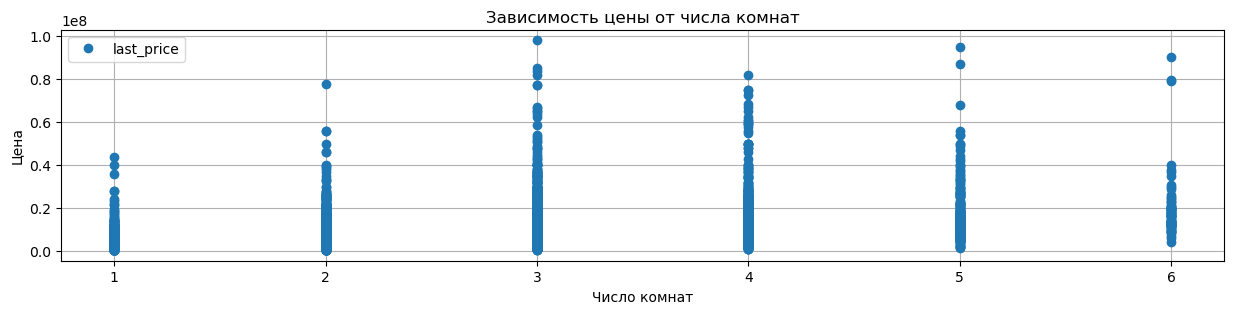

In [103]:
good_data.plot(x='rooms', y='last_price', style='o', grid=True, figsize=(15, 3))
plt.title('Зависимость цены от числа комнат')
plt.xlabel('Число комнат')
plt.ylabel('Цена');

In [104]:
good_data['rooms'].corr(good_data['last_price'])

0.4437940947010448

С увеличением числа комнат увеличивается общая стоимость квартиры.

3.5 Изучим зависимость цены от этажа, на котором расположена квартира (первый, последний, другой).

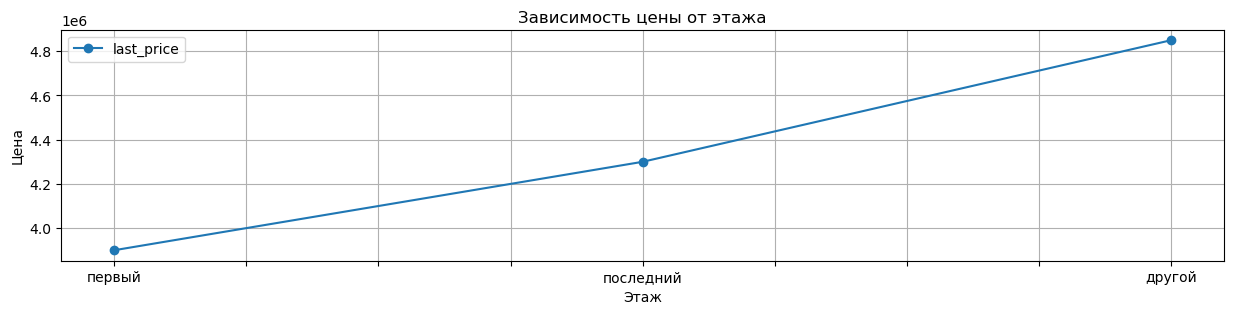

In [105]:
(good_data.pivot_table(index='floor_type', values='last_price', aggfunc='median')
 .sort_values(by='last_price', ascending=True)
 .plot(style='o-', grid=True, figsize=(15, 3))
)
plt.title('Зависимость цены от этажа')
plt.xlabel('Этаж')
plt.ylabel('Цена');

Квартиры не на первом и не на последнем этажах стоят дороже, при этом квартиры на последнем этаже стоят дороже, чем на первом.

3.6 Изучим зависимость цены от даты размещения (день недели, месяц, год).

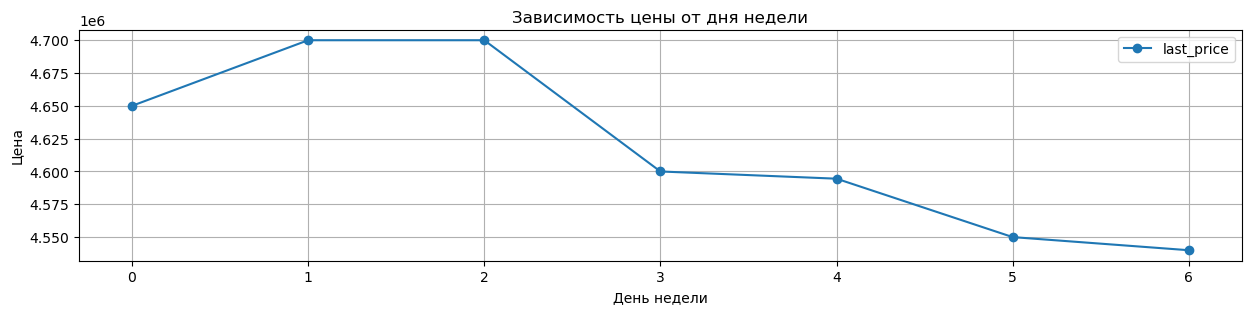

In [106]:
(good_data.pivot_table(index='weekday_exposition', values='last_price', aggfunc='median')
 .plot(style='o-', grid=True, figsize=(15, 3))
)
plt.title('Зависимость цены от дня недели')
plt.xlabel('День недели')
plt.ylabel('Цена');

Стоимость квартир, размещенных в начале недели (во вторник и в среду), выше, чем на выходных.

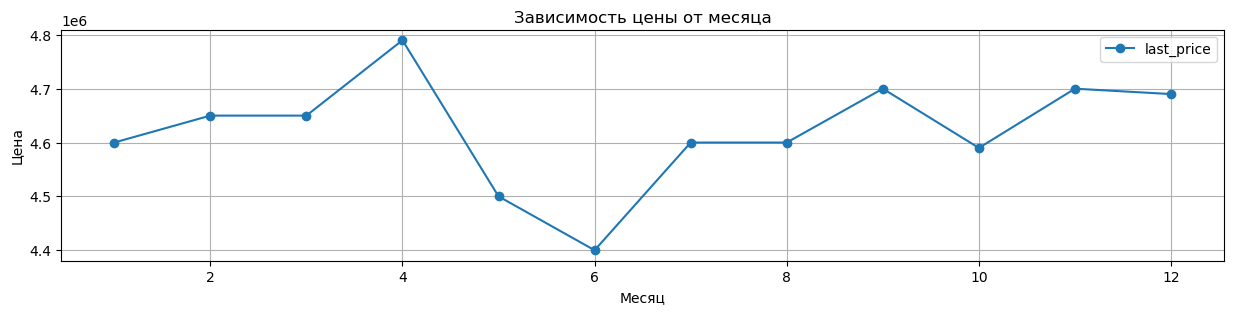

In [107]:
(good_data.pivot_table(index='month_exposition', values='last_price', aggfunc='median')
 .plot(style='o-', grid=True, figsize=(15, 3))
)
plt.title('Зависимость цены от месяца')
plt.xlabel('Месяц')
plt.ylabel('Цена');

Стоимость квартир, размещенных в апреле, выше, чем в другие месяцы. В июне наблюдается самая низкая стоимость квартир.

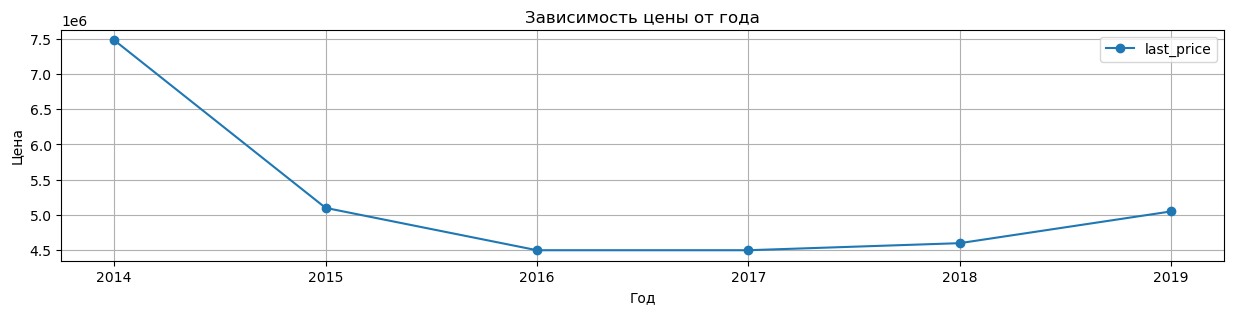

In [108]:
(good_data.pivot_table(index='year_exposition', values='last_price', aggfunc='median')
 .plot(style='o-', grid=True, figsize=(15, 3))
)
plt.title('Зависимость цены от года')
plt.xlabel('Год')
plt.ylabel('Цена');

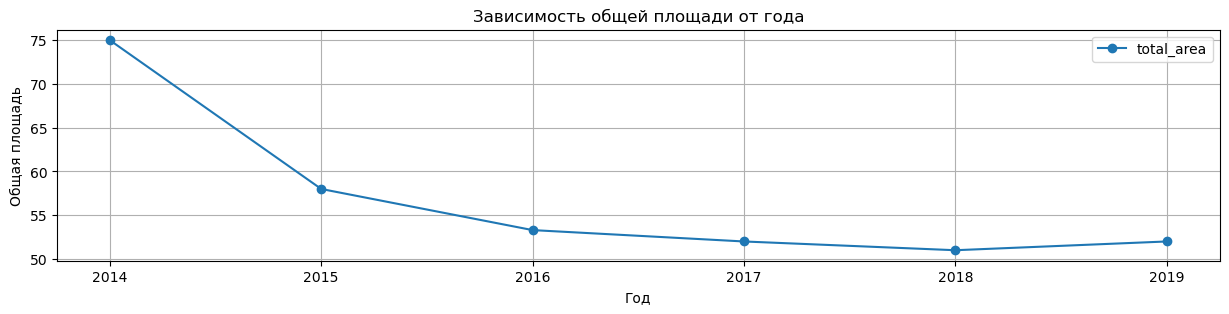

In [109]:
(good_data.pivot_table(index='year_exposition', values='total_area', aggfunc='median')
 .plot(style='o-', grid=True, figsize=(15, 3))
)
plt.title('Зависимость общей площади от года')
plt.xlabel('Год')
plt.ylabel('Общая площадь');

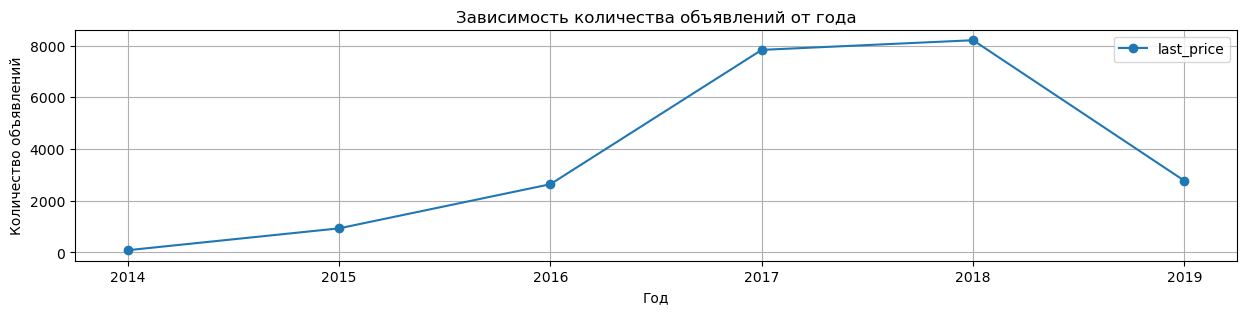

In [110]:
(good_data.pivot_table(index='year_exposition', values='last_price', aggfunc='count')
 .plot(style='o-', grid=True, figsize=(15, 3))
)
plt.title('Зависимость количества объявлений от года')
plt.xlabel('Год')
plt.ylabel('Количество объявлений');

C 2014 по 2017 год наблюдается снижение стоимости квартир. С 2017 по 2019 год стоимость начинает увеличиваться. Как показывают графики, снижение стоимости может быть связано с уменьшением средней площади квартир и увеличением количества объявлений в период с 2014 по 2018 год. В период с 2018 по 2019 год наблюдается резкий спад количества объявлений и увеличение средней площади квартир, поэтому начинает резко возрастать стоимость.

**4. Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.**

In [111]:
locality_price = good_data.pivot_table(index='locality_name', values='price_per_sqm', aggfunc=['count','mean'])
locality_price.columns = ['count','mean']
top10 = locality_price.sort_values(by='count', ascending=False).head(10).round(2)
top10

,count,mean
locality_name,,
Санкт-Петербург,14886,112532.71
поселок Мурино,506,84863.27
поселок Шушары,421,77806.80
Всеволожск,383,68744.37
Пушкин,351,103005.60
Колпино,334,75299.95
поселок Парголово,311,90051.87
Гатчина,300,69051.68
деревня Кудрово,273,92263.65


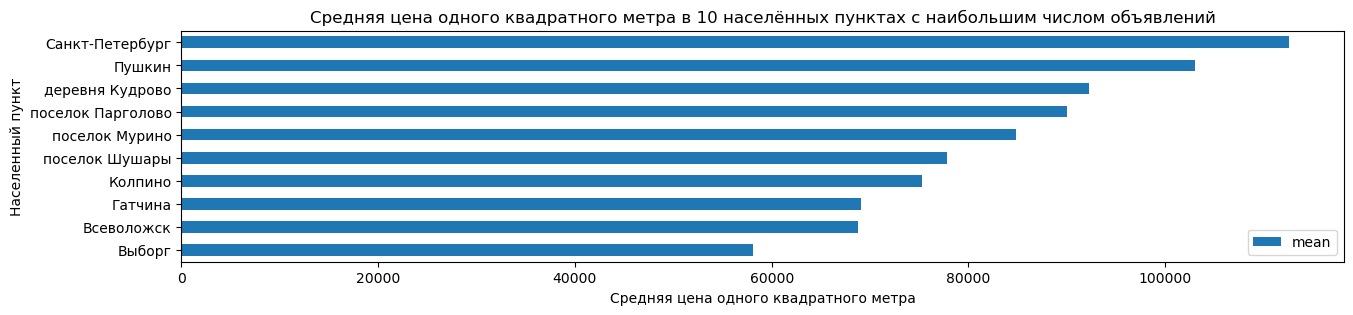

In [112]:
top10.sort_values(by='mean', ascending=True).plot(y = 'mean', kind = 'barh', figsize=(15, 3))
plt.title('Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений')
plt.xlabel('Средняя цена одного квадратного метра');
plt.ylabel('Населенный пункт');

Из 10 населенных пунктов с наибольшим числом объявлений, в Санкт-Петербурге – самая высокая стоимость за квадратный метр, а в Выборге – самая низкая стоимость квадратного метра.

**5. Опишем, как стоимость объектов зависит от расстояния до центра Санкт-Петербурга.**

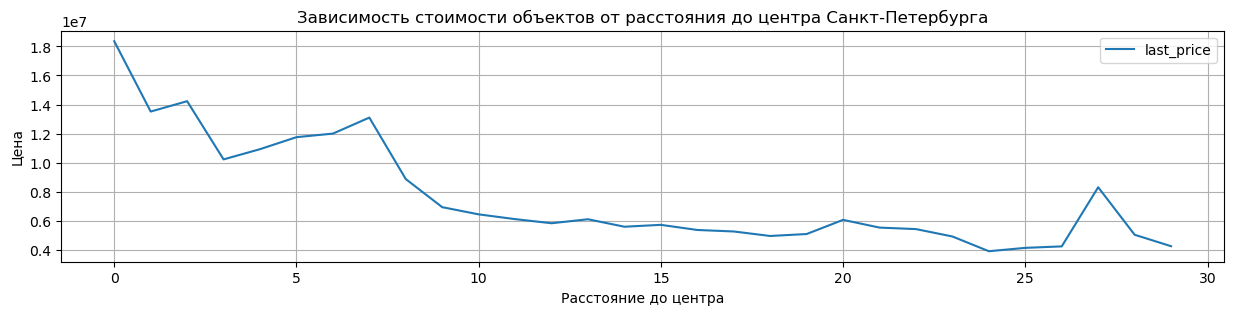

In [113]:
(
    good_data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='mean')
    .plot(grid=True, figsize=(15, 3))
)
plt.title('Зависимость стоимости объектов от расстояния до центра Санкт-Петербурга')
plt.xlabel('Расстояние до центра')
plt.ylabel('Цена');

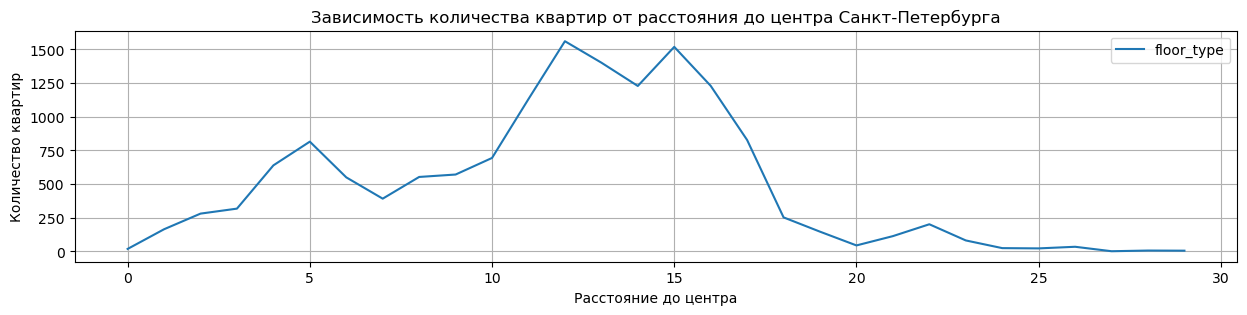

In [114]:
(
    good_data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='cityCenters_nearest_km', values='floor_type', aggfunc='count')
    .plot(grid=True, figsize=(15, 3))
)
plt.title('Зависимость количества квартир от расстояния до центра Санкт-Петербурга')
plt.xlabel('Расстояние до центра')
plt.ylabel('Количество квартир');

In [115]:
good_data.query('locality_name == "Санкт-Петербург" & cityCenters_nearest_km == 27')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,weekday_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
748,13,14350000,74.0,2017-11-28,2,3.13,5,30.0,3,False,...,1496.0,0,NaN,128.0,193918.918919,1,11,2017,другой,27.0
5961,6,2250000,32.0,2018-02-27,1,2.65,2,16.5,2,False,...,NaN,0,NaN,178.0,70312.500000,1,2,2018,последний,27.0


График показывает, что чем дальше от центра Санкт-Петербурга, тем ниже стоимость квартир. С 7 км начинается резкое падение цены на квартиры, которое может быть связано с ростом количества квартир на этом расстоянии от центра. Выброс на 27 км связан с одной дорогой квартирой стоимостью больше 14 миллионов.

### Общий вывод

Целью исследования было провести исследовательский анализ данных и установить параметры, влияющие на цену квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

Была изучена таблица с исходными данными и построена гистограмма для всех числовых столбцов таблицы на одном графике. В каждой строке таблицы содержатся данные по каждой квартире на продажу. Большая часть колонок описывает различные характеристики самой квартиры и ее местоположения, остальные данные содержат данные об объявлении.

На этапе предобработки данных были заполнены пропуски в данных, изменен тип данных и обработаны неявные дубликаты. Также были добавлены столбцы со следующими параметрами: цена одного квадратного метра, день, месяц и год публикации объявления; тип этажа квартиры, расстояние до центра города в километрах.

По результатам анализа данных можно сделать следующие выводы. В основном продаются квартиры: 
- с общей площадью около 52 кв. м;
- с жилой площадью около 30 кв. м;
- с площадью кухни около 9 кв. м;
- ценой около 4.6 млн;
- c 1-3 комнатами;
- с высотой потолков около 2.65 м;
- в домах, в которых 5 и 9 этажей;
- с расстоянием до центра города около 13 км;
- с расстоянием до ближайшего парка около 454 м.

Быстрыми можно считать продажи до 45 дней. Необычно долгими можно считать продажи дольше 230 дней. Стоимость квартиры больше всего зависит от общей площади – чем больше площадь, тем выше стоимость квартиры. С увеличением количества комнат увеличивается общая стоимость квартиры. Квартиры не на первом и не на последнем этажах стоят дороже, при этом квартиры на последнем этаже стоят дороже, чем на первом. Стоимость квартир, размещенных в начале недели выше, чем на выходных. Стоимость квартир, размещенных в апреле, выше, чем в другие месяцы, в июне наблюдается самая низкая стоимость квартир. 

C 2014 по 2017 год наблюдается снижение стоимости квартир, а с 2017 по 2019 год стоимость начинает увеличиваться. Снижение стоимости может быть связано с уменьшением средней площади квартир и увеличением количества объявлений в период с 2014 по 2018 год. В период с 2018 по 2019 год наблюдается резкий спад количества объявлений и увеличение средней площади квартир, поэтому начинает резко возрастать стоимость.

Из 10 населенных пунктов с наибольшим числом объявлений, в Санкт-Петербурге – самая высокая стоимость за квадратный метр, а в Выборге – самая низкая стоимость квадратного метра. При этом чем дальше от центра Санкт-Петербурга, тем ниже стоимость квартир.

При дальнейшем сборе данных рекомендуется уделять внимание пропускам не только в данных с характеристиками самой квартиры, но и пропускам в картографических данных. Также рекомендуется использовать добавленные параметры.